# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
#load_dotenv()

In [3]:
#Cell runs %env


In [4]:
# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [5]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [6]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [7]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [8]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19394806,
            "id": 1,
            "last_updated": 1686087586,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 524184136025,
                    "percent_change_1h": 0.052051926397677,
                    "percent_change_24h": 5.76672670873217,
                    "percent_change_7d": -2.92423085289594,
                    "percentage_change_1h": 0.052051926397677,
                    "percentage_change_24h": 5.76672670873217,
                    "percentage_change_7d": -2.92423085289594,
                    "price": 27004.0,
                    "volume_24h": 15924950899
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19394806,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [9]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120233889,
            "id": 1027,
            "last_updated": 1686087579,
            "max_supply": 120233889,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 225977130435,
                    "percent_change_1h": -0.191634912699294,
                    "percent_change_24h": 4.44221738575558,
                    "percent_change_7d": -1.47861126187167,
                    "percentage_change_1h": -0.191634912699294,
                    "percentage_change_24h": 4.44221738575558,
                    "percentage_change_7d": -1.47861126187167,
                    "price": 1878.05,
                    "volume_24h": 9763783008
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120233889,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cry

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [10]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print (f" The current price for Bitcoin is ${btc_price}")


 The current price for Bitcoin is $27004.0


In [11]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print (f" The current price for Ethereum is ${eth_price}")


 The current price for Ethereum is $1878.05


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [12]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of my BTC is ${btc_value}")

The current value of my BTC is $32404.8


In [13]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The current value of my Eth is ${eth_value}")


The current value of my Eth is $9953.664999999999


In [14]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f" The current value of my cryptocurrency wallet is ${total_crypto_wallet}")


 The current value of my cryptocurrency wallet is $42358.465


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [15]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [16]:
# #set ENV

# %env ALPACA_API_KEY = "PKR6KACCAN9G7QJ98HTN"
# %env ALPACA_SECRET_KEY = "YSYXxVn9blxC5NEJRVNOwMOLUew8sWfhfbIrh3Pv"

In [17]:
# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [18]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST("PKR6KACCAN9G7QJ98HTN", "YSYXxVn9blxC5NEJRVNOwMOLUew8sWfhfbIrh3Pv", api_version="v2", base_url='https://paper-api.alpaca.markets')


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [19]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY","AGG"]

# Set timeframe to 1Day
timeframe= "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
current_date = 2023-6-4
start_date = pd.Timestamp('2020-08-07', tz="America/New_York").isoformat()
end_date = pd.Timestamp('2020-08-07', tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [20]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio = alpaca.get_bars(tickers,timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data
portfolio_closing_prices = pd.DataFrame()
AGG = portfolio[portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio[portfolio['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
portfolio = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
print(portfolio.head(5))



                              AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372  


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [21]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = portfolio['AGG']['close'].iloc[-1]
agg_close_price = float(agg_close_price)

# Print the AGG closing price
print(f"AGG closing price is ${agg_close_price:.2f}")


AGG closing price is $119.43


In [22]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = portfolio['SPY']['close'].iloc[-1]
spy_close_price = float(spy_close_price)

# Print the SPY closing price
print(f"spy closing price is ${spy_close_price:.2f}")


spy closing price is $334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [23]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is ${agg_value}")


The current value of the bond portfolio is $23886.0


In [24]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is ${spy_value}")


The current value of the stock portfolio is $36802.7


In [25]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds}")

The current balance of the stock and bond portion of the portfolio is $60688.7


In [26]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f" The current cryptocurrency wallet balance is ${total_portfolio}")


 The current cryptocurrency wallet balance is $103047.165


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [27]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[42358.465, 60688.7]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [28]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame( {'amount':[total_crypto_wallet, total_stocks_bonds]},
    index=['Crypto Wallet', 'Stocks and Bonds'])

# Display the savings_df DataFrame
savings_df


,amount
Crypto Wallet,42358.465
Stocks and Bonds,60688.700


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot: title={'center': 'Total Value of Members Portfolio, 2020-08-07'}, ylabel='amount'>

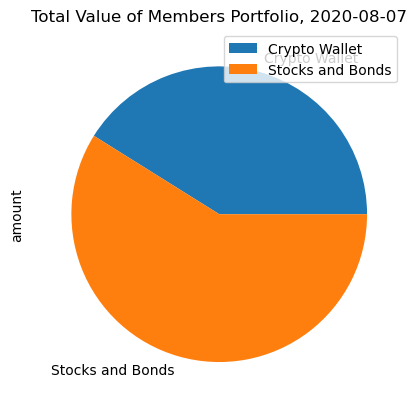

In [29]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Total Value of Members Portfolio, 2020-08-07')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [30]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income *3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [31]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
total_portfolio_value = (total_crypto_wallet +total_stocks_bonds)

if total_portfolio_value > emergency_fund_value:
    print("Congratulations! You have enough money in this fund.")
elif total_porfolio_value == emergency_fund_value:
    print("Congratulations! This is an important financial milestone.")
else:
    difference = emergency_fund_value - total_portfolio_value
    print(f"You are ${difference} away from reaching your emergency fund goal.")


Congratulations! You have enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [32]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
new_start_date = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
new_end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [33]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
new_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=new_start_date,
    end=new_end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = new_prices_df[new_prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = new_prices_df[new_prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
new_prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
new_prices_df.head()
new_prices_df.tail()


SPY                                    \
                               open    high     low   close    volume   
timestamp                                                               
2020-08-03 04:00:00+00:00  328.3200  329.62  327.73  328.67  53078112   
2020-08-04 04:00:00+00:00  327.8600  330.06  327.86  330.00  41917896   
2020-08-05 04:00:00+00:00  331.4700  332.39  331.18  332.03  42870955   
2020-08-06 04:00:00+00:00  331.4799  334.46  331.13  334.32  43679448   
2020-08-07 04:00:00+00:00  333.2800  334.88  332.30  334.57  57282821   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2020-08-03 04:00:00+00:00      288003  328.658795  119.37  119.40  119.1903   
2020-08-04 04:00:00+00:00      250899  329.057592  119.42  119.63  119.4200   
2020-08-05 04:00:00+00:00      241416  331.791643  119.39  119.49  119.3100   
2020-08-06 04:00:00+00:00      290036  332.939600  119.62  119.73  119.5300   
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.3950   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-03 04:00:00+00:00  119.40  13014535       36359  119.282420  
2020-08-04 04:00:00+00:00  119.63  10935154       39113  119.541666  
2020-08-05 04:00:00+00:00  119.40  17377874       42313  119.387245  
2020-08-06 04:00:00+00:00  119.57   4608710       15938  119.604199  
2020-08-07 04:00:00+00:00  119.43   5559066       15246  119.475306

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [34]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
thirty_yr_MC = MCSimulation(
    portfolio_data = new_prices_df,
    weights = [.60,.40],
    num_simulation = 100,
    num_trading_days = 252*30
)

# Review the simulation input data
thirty_yr_MC

In [35]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
thirty_yr_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996033,0.997816,1.002352,0.991093,1.005346,0.990516,0.995186,1.003548,1.011252,0.992123,...,0.999905,0.993421,1.006827,0.997374,1.011581,0.992369,0.979603,1.002020,1.000088,0.997996
2,1.001284,0.995512,0.999826,0.984489,0.999699,0.989334,1.003070,1.010492,1.015218,0.989087,...,0.998646,0.994318,1.013459,1.003323,1.013578,0.990025,0.978603,0.991484,1.010072,0.999789
3,1.002162,0.994495,0.999715,0.977541,0.990653,0.995071,1.005521,1.016643,1.018189,0.989855,...,0.974970,0.989057,1.027196,0.995645,1.017204,0.994232,0.979733,0.981256,1.017277,1.019931
4,0.997362,1.001307,1.016377,0.980516,1.002705,0.995305,0.995637,1.014893,1.017589,0.983237,...,0.962636,0.986568,1.039267,0.994868,1.028834,0.982516,0.983616,0.984948,1.000778,1.025116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,50.520616,12.751326,10.165382,2.713647,36.638868,3.205358,8.031742,4.903181,2.612161,11.437556,...,5.773960,11.649346,21.435928,5.111341,3.466351,5.469102,4.133249,13.806734,8.129447,4.562379
7557,51.470054,12.808600,10.165603,2.731641,36.566850,3.197934,8.068062,4.888484,2.606952,11.511631,...,5.657390,11.705930,21.291596,5.131022,3.466567,5.492981,4.156428,13.892857,8.250299,4.569868
7558,52.372491,12.986725,10.118736,2.759461,36.581016,3.181672,8.112318,4.881429,2.563535,11.315934,...,5.644007,11.706341,21.152868,5.135583,3.455718,5.587621,4.181073,13.986141,8.273202,4.523884
7559,51.915621,13.003069,9.944080,2.805695,36.357288,3.211532,8.096314,4.886631,2.514237,11.242557,...,5.584238,11.924762,21.112230,5.042979,3.490598,5.642232,4.180549,13.976367,8.258493,4.540389


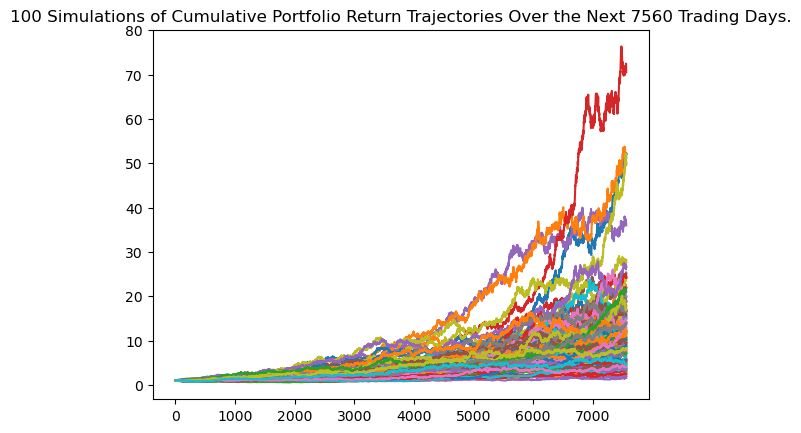

In [36]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
plot = thirty_yr_MC.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

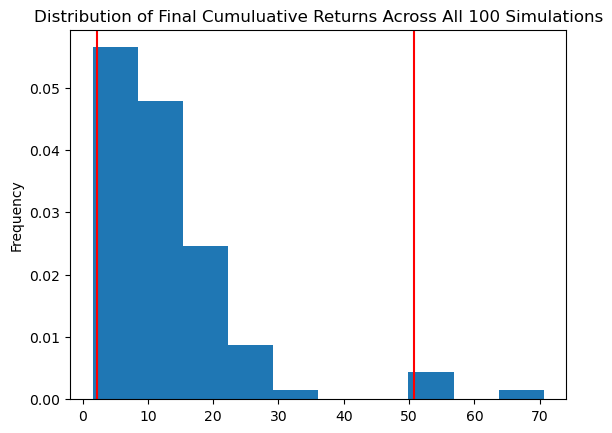

In [37]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
Hist_plot = thirty_yr_MC.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [38]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_statistics = thirty_yr_MC.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_statistics)

count           100.000000
mean             12.901066
std              11.277905
min               1.575806
25%               5.555258
50%              10.117783
75%              16.453568
max              70.619315
95% CI Lower      2.195756
95% CI Upper     50.710611
Name: 7560, dtype: float64


/Users/carygutknecht/Desktop/MOD5/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [39]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the members portfolio is ${total_portfolio_value}")

The current balance of the stock and bond portion of the members portfolio is $103047.165


In [40]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_statistics[8] * total_portfolio_value
ci_upper_thirty_cumulative_return = MC_statistics[9] * total_portfolio_value

# Print the result of your calculations
print(f"There is a 95% chance that your current Portfolio will have a value between ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f} in the 30 years.")

There is a 95% chance that your current Portfolio will have a value between $226266.41 and $5225584.72 in the 30 years.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [41]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
Ten_yr_MC = MCSimulation(
    portfolio_data = new_prices_df,
    weights = [.80,.20],
    num_simulation = 100,
    num_trading_days = 252*10
)

# Review the simulation input data
Ten_yr_MC


In [42]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
Ten_yr_MC.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001473,1.005032,0.984740,0.984927,1.006728,0.994930,1.000028,1.002675,0.990639,1.002111,...,0.995407,0.997519,0.991977,1.029403,1.000614,0.994150,1.003173,1.018026,0.991275,1.006575
2,0.991095,0.993637,0.983438,0.985673,0.997505,0.985228,0.997426,1.010387,0.990308,0.977670,...,1.000467,0.991934,1.012895,1.034661,1.027572,0.998157,0.998641,1.002757,0.990085,0.993900
3,0.974913,1.001652,0.980665,0.986338,0.995220,0.993665,0.984069,1.023099,1.014787,0.982406,...,1.012158,1.001186,1.022039,1.025464,1.032906,0.999639,1.003696,0.994034,0.988983,0.988344
4,0.976300,1.001029,0.970911,1.012192,1.002299,0.992366,0.977635,1.016076,1.005339,0.989928,...,1.016001,0.997148,1.029503,1.013563,1.017251,1.008064,0.987165,1.006700,0.982769,0.994203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.534005,2.999255,0.935751,1.930859,3.085061,4.184193,3.357856,2.789648,1.650662,3.679320,...,1.608796,2.601672,4.662992,8.953154,1.153917,4.418722,1.054596,2.898588,1.122000,2.759690
2517,2.516124,2.975074,0.920061,1.926053,3.069310,4.185168,3.345522,2.814069,1.653107,3.688717,...,1.590080,2.585145,4.661045,9.151835,1.137734,4.392811,1.059051,2.940509,1.118813,2.797416
2518,2.566609,2.964451,0.913529,1.928552,3.059808,4.153314,3.381778,2.818348,1.651117,3.696881,...,1.609799,2.606210,4.646398,9.079263,1.113315,4.422227,1.060163,2.899172,1.113237,2.823897
2519,2.557337,2.931434,0.906910,1.940117,3.062042,4.186351,3.421252,2.834027,1.630363,3.637106,...,1.600782,2.616093,4.615754,8.888815,1.106757,4.489892,1.045881,2.891939,1.117745,2.826330


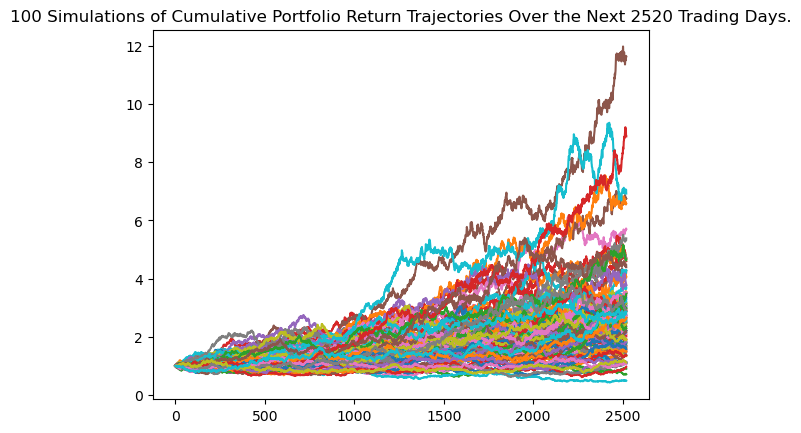

In [43]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
Ten_line_plot = Ten_yr_MC.plot_simulation()


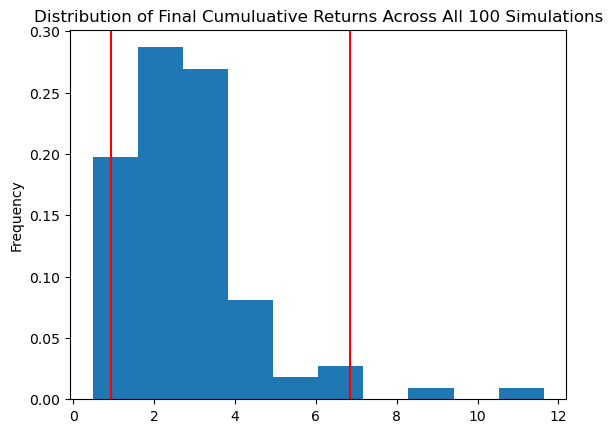

In [44]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
Hist_Ten_yr = Ten_yr_MC.plot_distribution()


In [45]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_Ten_statistics = Ten_yr_MC.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_Ten_statistics)


count           100.000000
mean              2.820724
std               1.699217
min               0.487369
25%               1.684339
50%               2.585154
75%               3.427193
max              11.637782
95% CI Lower      0.930174
95% CI Upper      6.839726
Name: 2520, dtype: float64


/Users/carygutknecht/Desktop/MOD5/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [46]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the members portfolio is ${total_portfolio_value}")


The current balance of the stock and bond portion of the members portfolio is $103047.165


In [47]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_Ten_statistics[8] * total_portfolio_value
ci_upper_thirty_cumulative_return = MC_Ten_statistics[9] * total_portfolio_value

# Print the result of your calculations
print(f"There is a 95% chance that your current Portfolio will have a value between ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f} in the 10 years.")

There is a 95% chance that your current Portfolio will have a value between $95851.76 and $704814.37 in the 10 years.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [48]:
No weighting the portfolio more heavil to stocks will not allow the credit union members to retire after 10 years.

SyntaxError: invalid syntax (4247210213.py, line 1)